In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.9 MB/s eta 0:00:00


In [ ]:
pip install Pillow==9.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,053 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
!sudo apt-get install tesseract-ocr-rus
!pip install pytesseract==0.3.9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-rus
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,274 kB of archives.
After this operation, 3,877 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-rus all 1:4.00~git30-7274cfa-1 [1,274 kB]
Fetched 1,274 kB in 2s (799 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-rus.
(Reading dat

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 15529, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 15529 (delta 49), reused 118 (delta 43), pack-reused 15393
Receiving objects: 100% (15529/15529), 14.59 MiB | 12.24 MiB/s, done.
Resolving deltas: 100% (10573/10573), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
import torch
import yolov5
import os
import cv2
import numpy as np
# Model
# model = torch.hub.load("ultralytics/yolov5", "yolov5s")  # or yolov5n - yolov5x6, custom
def rectangle(img):
  model_path = '/content/sample_data/best (2).pt' #os.path.join(os.path.dirname(__file__), 'best.pt')
  model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path)

  #model2 = torch.hub.load('ultralytics/yolov5', 'yolov5s')
  # Inference
  results = model(img)
  return np.array([results.pandas().xyxy[0]['xmin'], results.pandas().xyxy[0]['ymin'],results.pandas().xyxy[0]['xmax'],results.pandas().xyxy[0]['ymax']]).T

In [ ]:
import cv2
coordinates_res = rectangle(cv2.imread('/content/sample_data/test_2803.png'))

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CPU



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
from shapely import wkt
import numpy as np
import math

def centroid(vertexes):

     x = (vertexes[2]+vertexes[0])/2
     y = (vertexes[3]+vertexes[1])/2
     print(x,y)
     return[round(x), round(y)]

def sorted_rectangles(arr_coordinate_yolo):
  result_center=[]
  #134 -> 1322
  for i in arr_coordinate_yolo:
    result_center.append(centroid(i))
  #print(result_center)#3132
  #словарь, где ключ центр, а значение индекс строки
  sorted_string={tuple(result_center[a]): a for a in range(len(result_center))}
  print("not sorted",result_center)


  #x наименьший(), y наимешьший
  result_center=sorted(result_center, key=lambda k: [k[1], k[0]])

  for i in range(1, len(result_center)):
    y = result_center[i-1][1]
    if result_center[i][1] - y < 12:
      old_key = tuple(result_center[i])
      result_center[i][1] = y
      sorted_string[tuple(result_center[i])] = sorted_string.pop(old_key)

  result_center=sorted(result_center, key=lambda k: [k[1], k[0]])

  print("sorted",result_center)

  new_coord = np.array([])
  for i in result_center:
    new_coord = np.append(new_coord, arr_coordinate_yolo[sorted_string[tuple(i)]])

  new_coord=np.reshape(new_coord, (len(arr_coordinate_yolo), 4))
  return new_coord

In [ ]:
sortes_coordinates=sorted_rectangles(coordinates_res)

281.0605926513672 108.97929000854492
172.77469635009766 139.64232635498047
103.30740737915039 108.83671951293945
207.38003540039062 50.48054313659668
248.85888671875 171.62985229492188
165.12801361083984 194.97261810302734
37.988298654556274 229.4215850830078
231.68357849121094 108.63800048828125
244.61248016357422 23.515608310699463
230.1070556640625 197.4957733154297
216.15707397460938 229.72882843017578
140.21694564819336 52.58514595031738
285.9861297607422 138.12419891357422
178.15061950683594 171.44497680664062
50.25020980834961 108.6033935546875
120.20042419433594 24.44025707244873
218.35519409179688 257.98706817626953
36.70276999473572 51.93376541137695
199.67356872558594 20.84435224533081
75.73543357849121 21.440395832061768
23.490296363830566 284.9318542480469
29.384422540664673 196.13751220703125
40.52074956893921 83.2282943725586
63.394649505615234 284.9221649169922
86.13795471191406 51.50907897949219
91.68320846557617 256.96228790283203
115.27889251708984 84.99449157714844


In [ ]:
from PIL import Image
from google.colab.patches import cv2_imshow

img_test=cv2.imread('/content/sample_data/test_2803.png')
#img_test=Image.open('/content/sample_data/2803 test.png')
coordinates_res_test = rectangle(img_test)
sortes_coordinates_test=sorted_rectangles(coordinates_res_test)

for coordinates in sortes_coordinates:
  #img_test
  print(coordinates[0],coordinates[1],coordinates[2],coordinates[3])
  #img_new=img_test.crop((round(coordinates[0]),round(coordinates[2]),round(coordinates[1]),round(coordinates[3])))
  #img_new
  open_cv_image=img_test[round(coordinates[1]):round(coordinates[3]),round(coordinates[0]):round(coordinates[2])]
  #open_cv_image = np.array(img_new) 
  cv2_imshow(open_cv_image)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


281.0605926513672 108.97929000854492
172.77469635009766 139.64232635498047
103.30740737915039 108.83671951293945
207.38003540039062 50.48054313659668
248.85888671875 171.62985229492188
165.12801361083984 194.97261810302734
37.988298654556274 229.4215850830078
231.68357849121094 108.63800048828125
244.61248016357422 23.515608310699463
230.1070556640625 197.4957733154297
216.15707397460938 229.72882843017578
140.21694564819336 52.58514595031738
285.9861297607422 138.12419891357422
178.15061950683594 171.44497680664062
50.25020980834961 108.6033935546875
120.20042419433594 24.44025707244873
218.35519409179688 257.98706817626953
36.70276999473572 51.93376541137695
199.67356872558594 20.84435224533081
75.73543357849121 21.440395832061768
23.490296363830566 284.9318542480469
29.384422540664673 196.13751220703125
40.52074956893921 83.2282943725586
63.394649505615234 284.9221649169922
86.13795471191406 51.50907897949219
91.68320846557617 256.96228790283203
115.27889251708984 84.99449157714844


61.6557502746582 13.381770133972168 89.81511688232422 29.499021530151367


96.03846740722656 17.467084884643555 144.3623809814453 31.413429260253906


148.81524658203125 15.760860443115234 175.80587768554688 30.892154693603516


179.1363983154297 10.97042179107666 220.2107391357422 30.71828269958496


224.9241485595703 12.754441261291504 264.3008117675781 34.27677536010742


5.188537120819092 43.715850830078125 68.21700286865234 60.15167999267578


66.60723114013672 43.06162643432617 105.6686782836914 59.9565315246582


107.3647689819336 41.13742446899414 173.06912231445312 64.03286743164062


179.14791870117188 40.724098205566406 235.61215209960938 60.23698806762695


253.4236602783203 42.01810073852539 280.2648010253906 58.059349060058594


3.3119993209838867 69.76117706298828 77.72949981689453 96.6954116821289


82.5128173828125 70.96990966796875 148.0449676513672 99.01907348632812


152.24769592285156 70.95738983154297 179.1223602294922 90.15576171875


180.9192352294922 70.01605224609375 222.32540893554688 100.1816635131836


224.10354614257812 68.85211944580078 264.1666259765625 94.38662719726562


280.31060791015625 72.44210052490234 311.496826171875 87.64875793457031


0.4247276782989502 101.05485534667969 25.919666290283203 119.20355224609375


28.82068634033203 98.42317962646484 71.67973327636719 118.78360748291016


75.28417205810547 99.37462615966797 131.3306427001953 118.29881286621094


134.28062438964844 105.28177642822266 177.09510803222656 125.08675384521484


178.321533203125 101.14234924316406 202.73110961914062 117.45980834960938


208.7332763671875 98.1736831665039 254.63388061523438 119.1023178100586


257.9615783691406 98.28778076171875 304.15960693359375 119.6707992553711


7.4178242683410645 127.35291290283203 27.73981475830078 151.4995880126953


32.510074615478516 129.064208984375 108.3096923828125 154.88369750976562


111.93282318115234 128.35220336914062 141.16168212890625 148.15963745117188


144.70388793945312 128.8060302734375 200.8455047607422 150.47862243652344


206.4935760498047 136.82667541503906 228.98141479492188 147.22103881835938


231.2124481201172 130.76956176757812 261.82476806640625 147.19586181640625


263.6380310058594 128.60650634765625 308.334228515625 147.6418914794922


17.68140411376953 156.7413787841797 88.58223724365234 175.61402893066406


87.51317596435547 157.2712860107422 107.9793930053711 174.87632751464844


108.09365844726562 158.62635803222656 150.00308227539062 176.79505920410156


149.93478393554688 161.54620361328125 206.366455078125 181.34375


218.50833129882812 157.3431854248047 279.2094421386719 185.91651916503906


4.446117877960205 187.1855010986328 54.32272720336914 205.0895233154297


53.750030517578125 196.22439575195312 74.28284454345703 206.70558166503906


80.94062042236328 183.09869384765625 99.75486755371094 206.47300720214844


102.34329986572266 189.3931121826172 131.3776397705078 209.73365783691406


140.17823791503906 182.4903564453125 190.07778930664062 207.4548797607422


197.11856079101562 187.44227600097656 263.0955505371094 207.5492706298828


5.917988300323486 221.1741485595703 70.05860900878906 237.6690216064453


71.4391860961914 216.4214324951172 111.47535705566406 235.46673583984375


119.69087219238281 223.78746032714844 147.7291717529297 237.72178649902344


149.89625549316406 220.099365234375 189.79901123046875 239.4691162109375


187.32704162597656 220.83912658691406 244.9871063232422 238.6185302734375


0.7520384192466736 250.95245361328125 63.46626663208008 266.8584899902344


73.01808166503906 244.30726623535156 110.34833526611328 269.6173095703125


111.4229736328125 248.28118896484375 178.95555114746094 265.46905517578125


184.67417907714844 249.59812927246094 252.0362091064453 266.3760070800781


275.7796630859375 245.75680541992188 298.3078918457031 261.6800842285156


6.791757583618164 274.4041442871094 40.18883514404297 295.4595642089844


41.97132873535156 274.6248474121094 84.8179702758789 295.219482421875


In [ ]:
import cv2
def preprocessing(img):
  #inverted image
  inverted_image=cv2.bitwise_not(img)
  #серые тона изображения
  def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  gray_image = grayscale(img)

  #black-white img
  thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)

#Morphological Transformations
  def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)#расширение изображения
    kernel = np.ones((1, 1), np.uint8)
    #эрозию изображения
    #Основная идея-размывает границы объекта переднего плана
    image = cv2.erode(image, kernel, iterations=1)
    #Dilation с последующим расширением
    #Это полезно для закрытия небольших отверстий внутри объектов 
    #переднего плана или небольших черных точек на объекте.
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    #median filter
    image = cv2.medianBlur(image, 3)
    return (image)

  no_noise = noise_removal(im_bw)

  def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

  eroded_image = thin_font(no_noise)

  def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

  dilated_image = thick_font(no_noise)

  def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

  no_borders = remove_borders(no_noise)

  color = [255, 255, 255]
  top, bottom, left, right = [150]*4

  image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)


  return image_with_border

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests
from google.colab.patches import cv2_imshow
# load image from the IAM database
# url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
#image = Image.open(requests.get(url, stream=True).raw).convert("RGB")
def recognise_microsost(image_cv2): 
  cv2_imshow(image_cv2)
  image_cv2=cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
  

  coordinates_res = rectangle(image)
  sorted_coordinates=sorted_rectangles(coordinates_res)

  text = ''
  processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
  model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')
  for i in sorted_coordinates:
    image_new=image[round(i[1]):round(i[3]), round(i[0]):round(i[2])]
    imagePIL = Image.fromarray(image_new)
    pixel_values = processor(images=imagePIL, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    text += generated_text+" "
  # print(len(generated_text))
  return text

In [ ]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np
import cv2
def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold

    newImage = cvImage.copy()
    #gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(cvImage, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
    
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

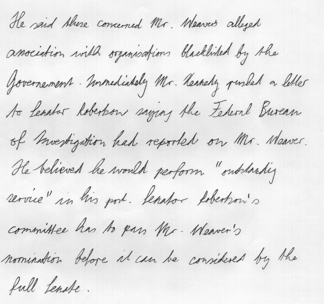

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-15 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 


requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


281.0605926513672 108.97929000854492
172.77469635009766 139.64232635498047
103.30740737915039 108.83671951293945
207.38003540039062 50.48054313659668
248.85888671875 171.62985229492188
165.12801361083984 194.97261810302734
37.988298654556274 229.4215850830078
231.68357849121094 108.63800048828125
244.61248016357422 23.515608310699463
230.1070556640625 197.4957733154297
216.15707397460938 229.72882843017578
140.21694564819336 52.58514595031738
285.9861297607422 138.12419891357422
178.15061950683594 171.44497680664062
50.25020980834961 108.6033935546875
120.20042419433594 24.44025707244873
218.35519409179688 257.98706817626953
36.70276999473572 51.93376541137695
199.67356872558594 20.84435224533081
75.73543357849121 21.440395832061768
23.490296363830566 284.9318542480469
29.384422540664673 196.13751220703125
40.52074956893921 83.2282943725586
63.394649505615234 284.9221649169922
86.13795471191406 51.50907897949219
91.68320846557617 256.96228790283203
115.27889251708984 84.99449157714844


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


10


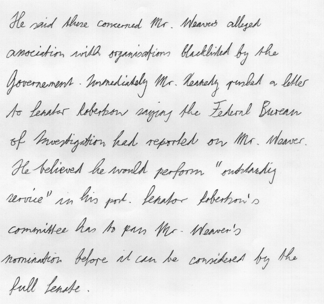

be said. abuse. conveermed. Mr. wheavers. alleged. association. with organisations. black-listed. the Government. isomediably Mr. hesney. pursled. letter. to temator. Robertsons. saying. the federal. bureauism. of investation. feed. reported. 6thp. n.r. intamer. He believed. the would perform. outstanding service " 1.m. his. punk. Senator. Robertson's committee. has # fears. Mr. weaver's recommemation. before. it can be considered. the full female.  TI Ud

wh rT yy hy Upmey
GROG YONG OG lame)
SOT 1G eyed,
Lpgp, wtpol ypu peapy 1p
an Ty EM ar? aa
OTE ern Tag
ne reed Spy ry Gorayrog, yeserensef
WY pray ompowl ape eprewe
wrtlage emmy vay Premmicn magy peop



'be said. abuse. conveermed. Mr. wheavers. alleged. association. with organisations. black-listed. the Government. isomediably Mr. hesney. pursled. letter. to temator. Robertsons. saying. the federal. bureauism. of investation. feed. reported. 6thp. n.r. intamer. He believed. the would perform. outstanding service " 1.m. his. punk. Senator. Robertson\'s committee. has # fears. Mr. weaver\'s recommemation. before. it can be considered. the full female. '

In [ ]:
import pytesseract
import numpy as np
from google.colab.patches import cv2_imshow

import imutils

from difflib import SequenceMatcher

def recognise_tesseract(image_cv2):
  image=cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
  angle = getSkewAngle(image)
  if angle !=-90:
    image = rotateImage(image, -1.0 * angle)

  cv2_imshow(image)

  try:
    results = pytesseract.image_to_osd(image, output_type=pytesseract.Output.DICT)
    image = imutils.rotate_bound(image , angle=results["rotate"])     
  except:
    print("too few characters")
  
  custom_config = r'--oem 3 --psm 6'
  return pytesseract.image_to_string(image, lang='eng', config=custom_config)

def recognise(image):

  res_text_microsos=recognise_microsost(image)
  res_text_tesseract=recognise_tesseract(image)
  
  print(res_text_microsos, res_text_tesseract)
  if (len(res_text_tesseract) > len(res_text_microsos)):
    return res_text_tesseract
  return res_text_microsos


image = cv2.imread('/content/sample_data/test_2803.png')
image_new=preprocessing(image)

recognise(image)